In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt


from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2024-04-02 15:26:17.789716: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 15:26:17.789878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 15:26:17.963337: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import pandas as pd
df = pd.read_csv("/kaggle/input/nifty50-stock-market-data/AXISBANK.csv")

In [5]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [6]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.0,5949937.0,0.2749
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.0,18080082.0,0.3883
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.0,17851331.0,0.3302
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.0,7357520.0,0.2836
5305,2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,1.655365e+15,232879.0,6786072.0,0.2949


In [8]:
#selecting only column of interest
Date_column = 'Date'
open_column = 'Open'
high_column = 'High'
Low_column = 'Low'
close_column = 'Close'
volume_column = 'Volume'

main_df = df[[Date_column, open_column, high_column,Low_column,close_column,volume_column]]
print(main_df)



            Date   Open    High     Low   Close    Volume
0     2000-01-03   26.7   26.70   26.70   26.70    112100
1     2000-01-04   27.0   28.70   26.50   26.85    234500
2     2000-01-05   26.0   27.75   25.50   26.30    170100
3     2000-01-06   25.8   27.00   25.80   25.95    102100
4     2000-01-07   25.0   26.00   24.25   24.80     62600
...          ...    ...     ...     ...     ...       ...
5301  2021-04-26  694.0  703.80  684.50  700.45  21646184
5302  2021-04-27  691.1  703.90  684.10  699.55  46559967
5303  2021-04-28  708.0  712.50  688.15  708.15  54060587
5304  2021-04-29  712.0  726.90  707.00  719.40  25939327
5305  2021-04-30  705.0  729.85  705.00  714.90  23011654

[5306 rows x 6 columns]


In [11]:
main_df.loc[:, 'Open'] = main_df['Open'].astype(int)
main_df.loc[:, 'High'] = main_df['High'].astype(int)
main_df.loc[:, 'Low'] = main_df['Low'].astype(int)
main_df.loc[:, 'Close'] = main_df['Close'].astype(int)


In [12]:
main_df

,Date,Open,High,Low,Close,Volume
0,2000-01-03,26,26,26,26,112100
1,2000-01-04,27,28,26,26,234500
2,2000-01-05,26,27,25,26,170100
3,2000-01-06,25,27,25,25,102100
4,2000-01-07,25,26,24,24,62600
...,...,...,...,...,...,...
5301,2021-04-26,694,703,684,700,21646184
5302,2021-04-27,691,703,684,699,46559967
5303,2021-04-28,708,712,688,708,54060587
5304,2021-04-29,712,726,707,719,25939327


Trend


In [14]:
import matplotlib.pyplot as plt

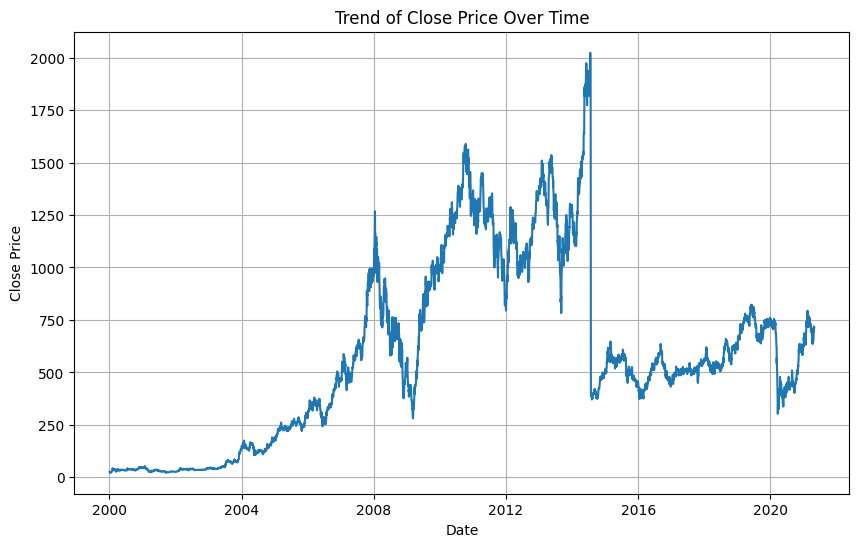

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the trend of the 'Close' column
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Trend of Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

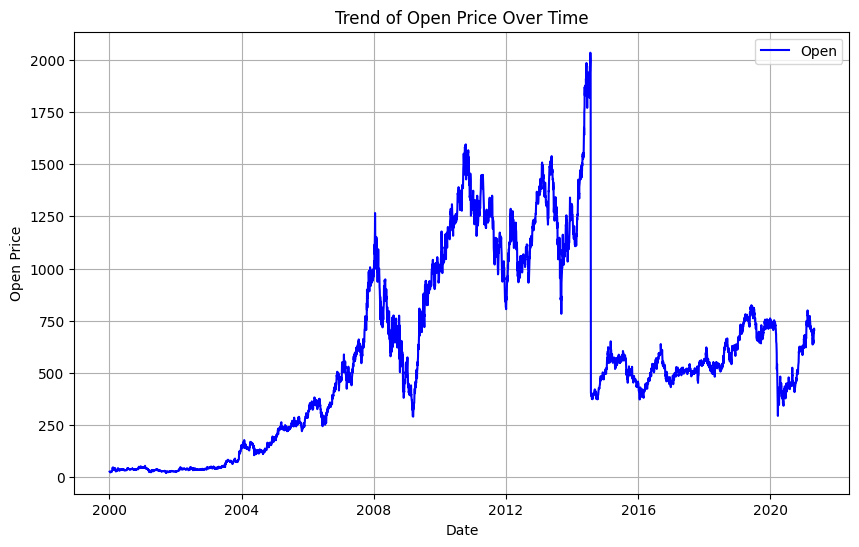

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], color='blue', label='Open')
plt.title('Trend of Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.legend()
plt.show()

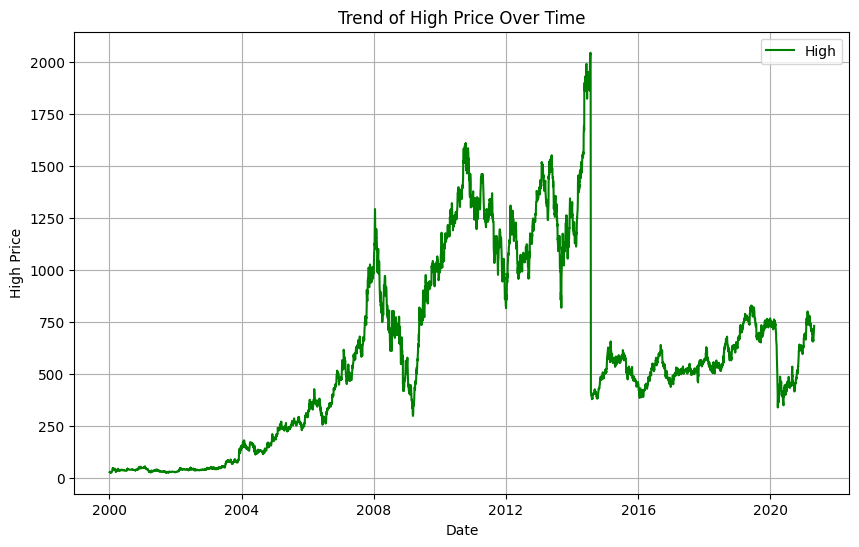

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], color='green', label='High')
plt.title('Trend of High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.legend()
plt.show()

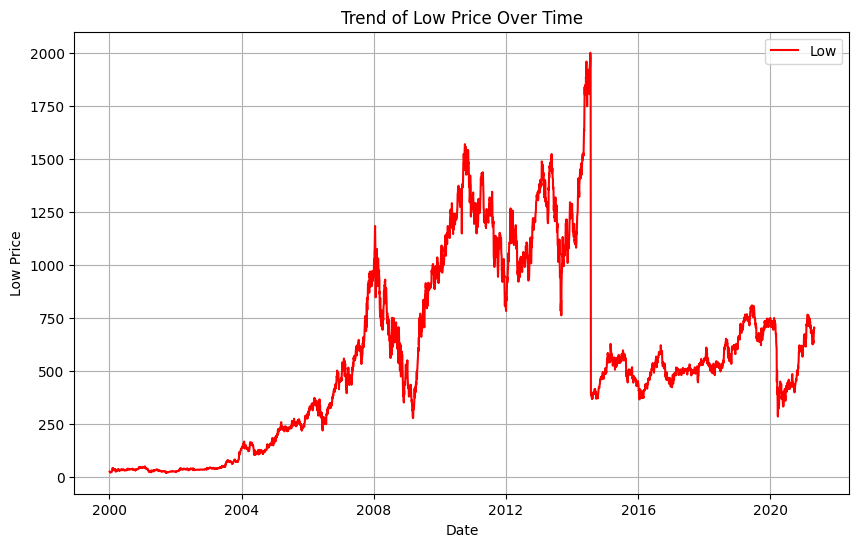

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Low'], color='red', label='Low')
plt.title('Trend of Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.grid(True)
plt.legend()
plt.show()

DataPreprocessing

In [106]:
data3 = main_df
data3 = data3.set_index('Date') 
data3 = data3[['Open','High','Low','Close','Volume']]


Creating new variable moving average

In [107]:

# Calculate the expanding mean for each numeric column separately
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    # Create a new column with the expanding mean and suffix '_ma2'
    data3[column+'_ma2'] = data3[column].expanding(min_periods=3).mean()


In [108]:
data3.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Open_ma2      2
High_ma2      2
Low_ma2       2
Close_ma2     2
Volume_ma2    2
dtype: int64

In [109]:
data3['EMA'] = data3.iloc[:,0].ewm(span=3,adjust=False).mean() #ewm is used exponential moving average

In [110]:
data3.head()

,Open,High,Low,Close,Volume,Open_ma2,High_ma2,Low_ma2,Close_ma2,Volume_ma2,EMA
Date,,,,,,,,,,,
2000-01-03,26,26,26,26,112100,NaN,NaN,NaN,NaN,NaN,26.0000
2000-01-04,27,28,26,26,234500,NaN,NaN,NaN,NaN,NaN,26.5000
2000-01-05,26,27,25,26,170100,26.333333,27.0,25.666667,26.00,172233.333333,26.2500
2000-01-06,25,27,25,25,102100,26.000000,27.0,25.500000,25.75,154700.000000,25.6250
2000-01-07,25,26,24,24,62600,25.800000,26.8,25.200000,25.40,136280.000000,25.3125


Predict the closing price of the stock for the next time step.Predict the closing price of the stock for the next time step.

In [111]:
data3.dropna(inplace=True)

In [112]:
data3.head()

,Open,High,Low,Close,Volume,Open_ma2,High_ma2,Low_ma2,Close_ma2,Volume_ma2,EMA
Date,,,,,,,,,,,
2000-01-05,26,27,25,26,170100,26.333333,27.000000,25.666667,26.000000,172233.333333,26.250000
2000-01-06,25,27,25,25,102100,26.000000,27.000000,25.500000,25.750000,154700.000000,25.625000
2000-01-07,25,26,24,24,62600,25.800000,26.800000,25.200000,25.400000,136280.000000,25.312500
2000-01-10,25,26,25,25,64200,25.666667,26.666667,25.166667,25.333333,124266.666667,25.156250
2000-01-11,24,24,23,23,91700,25.428571,26.285714,24.857143,25.000000,119614.285714,24.578125


In [116]:
#Cases is the column we have to predict.
target=data3[['Close']]
del data3['Close']

In [118]:
data3.drop(data3.index[len(data3)-1], axis=0, inplace=True) #Drop the last row in dataset
target.drop(target.index[len(target)-1], axis=0, inplace=True) #Drop the last row in target

/tmp/ipykernel_33/2066843613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.drop(target.index[len(target)-1], axis=0, inplace=True) #Drop the last row in target


In [119]:
x, y = data3.values, target.values

In [120]:
x.shape

(5303, 10)

In [121]:
y.shape

(5303, 1)

Scaling the values for the model

In [122]:
x_scaled_set = MinMaxScaler() #Use MinMaxScaler function from sklearn.preprocessing library
y_scaled_set = MinMaxScaler()

X = x_scaled_set.fit_transform(x) #Fit to data and transform the data array x
Y = y_scaled_set.fit_transform(y.reshape(-1,1)) #Fit to data and transform the data array y. Reshape the y variable to long format

In [123]:
x.shape

(5303, 10)

In [124]:
X_train_data=X[0:4000,]
y_train_data=Y[0:4000,]
X_test_data=X[4000:4690,]
y_test_data=Y[4000:4690,]

In [125]:
X_train_data.shape

(4000, 10)

In [126]:
y_test_data.shape

(690, 1)

In [127]:
X_train_data = X_train_data.reshape((-1,1,2)) #Reshape train dataset to required format
X_test_data = X_test_data.reshape((-1,1,2)) #Reshape test dataset to required format

#### Build Model using RNN & Grated Recurrent Unit (GRU)

In [128]:
GRU_model = Sequential() #Use Sequential function from keras.model library
GRU_model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(1, 2))) #Add GRU model with 512 units. Note that return sequences should be true to pass on the sequences. Ensure that input_shape is inline with the inout data.
GRU_model.add(Dropout(0.2)) #Add a dropout layer to avoid overfitting.
GRU_model.add(GRU(units=256)) #Add another GRU layer with 256 units.
GRU_model.add(Dropout(0.2)) #Add another dropout layer to avoid overfitting.
GRU_model.add(Dense(1, activation='sigmoid')) #Finally, add a dense layer for getting a fully connected layer.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [129]:
GRU_model.compile(loss='mse', optimizer='adam', metrics = ['accuracy']) #mse is mean square error which is the loss function and Adam optimizer will be the ooptimizer.

Training the dataset

In [131]:
# Reshape train and test datasets to required format for GRU model
X_train_data = X_train_data.reshape((-1, 1, 10))  # Reshape train dataset to required format
X_test_data = X_test_data.reshape((-1, 1, 10))

In [132]:
# Build Model using RNN & GRU
GRU_model = Sequential()  # Use Sequential function from keras.model library
GRU_model.add(GRU(units=512, return_sequences=True, input_shape=(1, 10)))  # Add GRU model with 512 units. Note that return sequences should be true to pass on the sequences. Ensure that input_shape is inline with the input data.
GRU_model.add(Dropout(0.2))  # Add a dropout layer to avoid overfitting.
GRU_model.add(GRU(units=256))  # Add another GRU layer with 256 units.
GRU_model.add(Dropout(0.2))  # Add another dropout layer to avoid overfitting.
GRU_model.add(Dense(1, activation='sigmoid')) 

In [133]:
GRU_model.compile(optimizer='adam', loss='mean_squared_error')

In [134]:
# Fit the model
history = GRU_model.fit(X_train_data, y_train_data, batch_size=250, epochs=100, validation_split=0.15, verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.1020 - val_loss: 0.0777
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0184 - val_loss: 0.0195
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0055 - val_loss: 0.0031
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0011 - val_loss: 9.3449e-04
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 9.2140e-04 - val_loss: 0.0011
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.3365e-04 - val_loss: 0.0015
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.0603e-04 - val_loss: 0.0016
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024    
Score: 0.003279675031080842
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


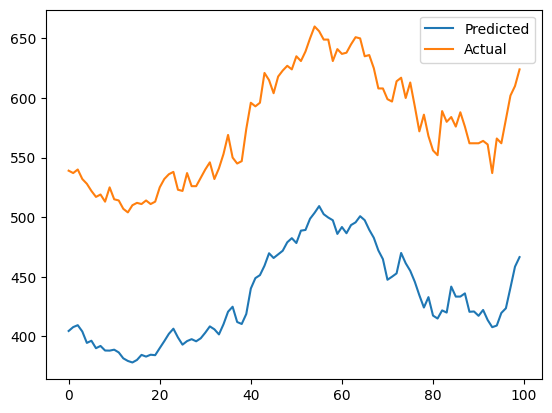

In [135]:
score = GRU_model.evaluate(X_test_data, y_test_data) #Evaluate model can be used to get the loss metric.
print('Score: {}'.format(score))
y_pred = GRU_model.predict(X_test_data) #Apply the built model on test data.
y_test_pred = y_scaled_set.inverse_transform(y_pred) #Use inverse transform to undo the scaling that was done before. This gives us the original values.
y_test_actual = y_scaled_set.inverse_transform(y_test_data) # Apply the inverse transform on the actual dataset for easy comparison of predicted vs actual.
plt.plot(y_test_pred[-100:], label='Predicted') #Plot the predicted vs actual graph
plt.plot(y_test_actual[-100:], label='Actual')
plt.legend()
plt.show()

In [137]:
test_Dates = main_df['Date'][4000:4690]  # create an object which has the dates for the Test data


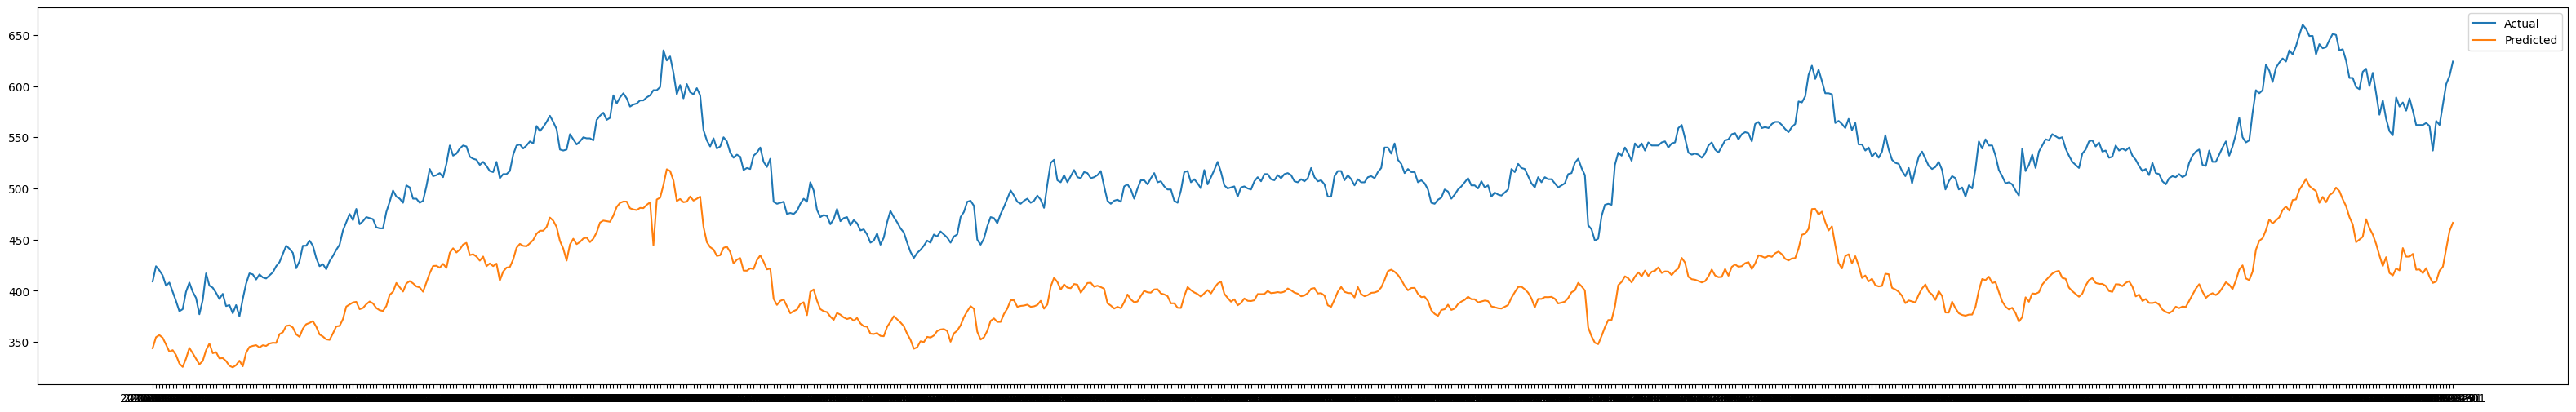

In [138]:


# Define the figure size
fig_size = (40, 6)  # Adjust width and height as needed

# Create a new figure with the specified size
plt.figure(figsize=fig_size)

# Assuming test_Dates, y_test_actual, and y_test_pred are already defined

# Plot actual and predicted data
plt.plot(test_Dates, y_test_actual[-690:], label='Actual')
plt.plot(test_Dates, y_test_pred[-690:], label='Predicted')

# Add legend
plt.legend()

# Show the plot
plt.show()
